In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns

In [3]:
files = os.listdir("Shots")

In [4]:
files

['AFOrigins.csv',
 'bakersfieldOrigins.csv',
 'calPolyOrigins.csv',
 'csunOrigins.csv',
 'davisOrigins.csv',
 'DukeOrigins.csv',
 'fullertonOrigins.csv',
 'irvineOrigins.csv',
 'LipscombOrigins.csv',
 'NavyOrigins.csv',
 'riversideOrigins.csv',
 'sacStateOrigins.csv',
 'SantaClaraOrigins.csv',
 'SJSOrigins.csv',
 'ucsbOrigins.csv',
 'USDOrigins.csv',
 'UVOrigins.csv']

In [5]:
merged = pd.read_csv("Shots/"+files[0])
merged = merged.get(["index","Game","numOpportunity","Event","Result","startX","startY","endX","endY","Side","Team"])
numOpp = merged.get("numOpportunity").max()+1
for file in files:
    df = pd.read_csv("Shots/"+file)
    df = df.get(["index","Game","numOpportunity","Event","Result","startX","startY","endX","endY","Side","Team"])
    df["numOpportunity"]+=numOpp
    numOpp = df.get("numOpportunity").max()+1
    merged = pd.merge(merged,df,how="outer")
opportunities = merged.dropna()
opportunities["Team"] = opportunities["Team"].apply(lambda team: "UCSD" if team =="UCSD" else "Opponent")
opportunities = opportunities.sort_values(["numOpportunity","index"])
opportunityGoals = []
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[-1]
    if ("Shot" in limited.get("Event"))and (limited.get("Result") =="Successful"):
        opportunityGoals.append(i)
def addGoal(num):
    if num in opportunityGoals:
        return True
    else:
        return False
opportunities = opportunities.assign(resultGoal = opportunities.get("numOpportunity").apply(addGoal))
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [6]:
origins["Event"] = origins["Event"].str.replace("2nd Ball","Tackle")

Text(0.5, 1.0, 'Opponent Shots Origin')

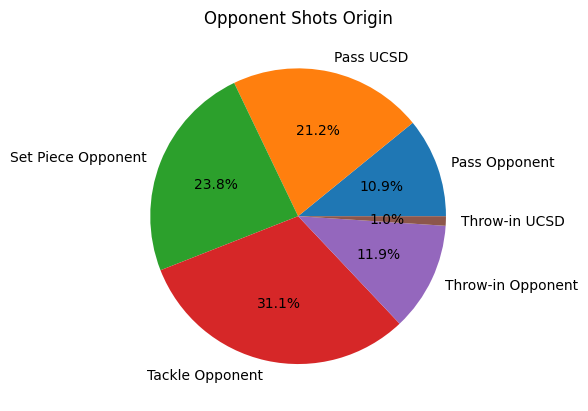

In [7]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("Game"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shots Origin")

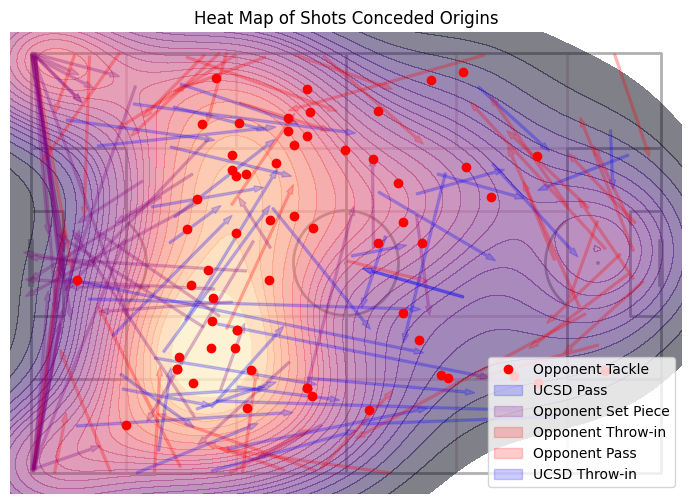

In [8]:
pitch = Pitch(positional=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Set Piece":
         color = "purple"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())

In [9]:
oringsNoSet = origins[origins.get("Event")!="Set Piece"]

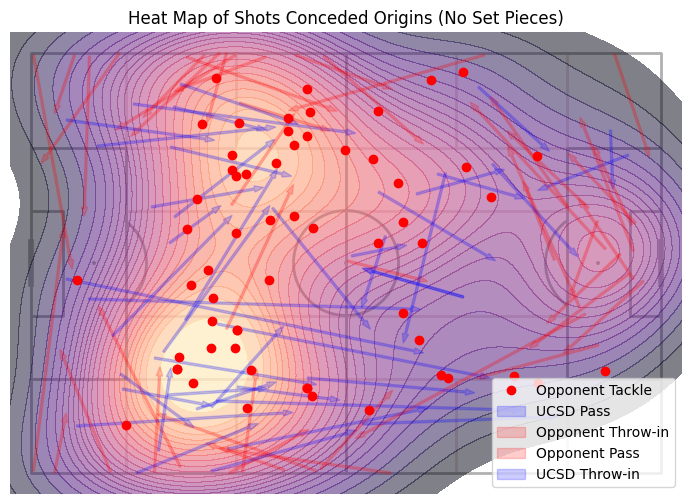

In [10]:
pitch = Pitch(positional=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=oringsNoSet.get("startX"),y=oringsNoSet.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(oringsNoSet.shape[0]):
    row = oringsNoSet.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Set Piece":
         color = "purple"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins (No Set Pieces)")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())

In [11]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
shotAssists = shotAssists[~ ((shotAssists.get("Event")=="Set Piece") & (shotAssists.get("endX")<2))]

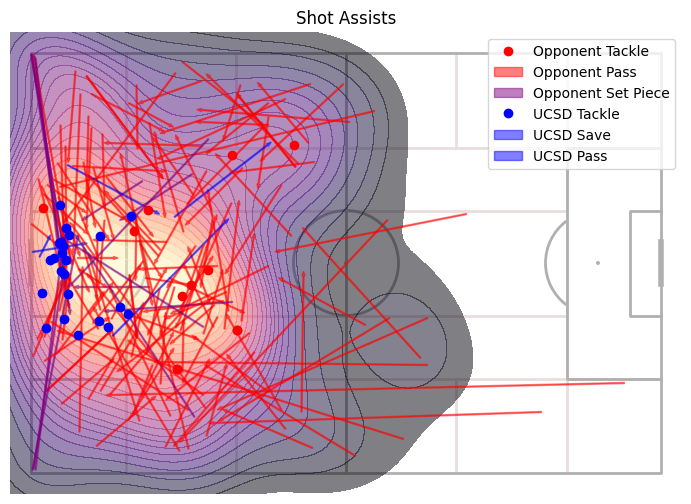

In [12]:
pitch = Pitch(positional=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event")=="Set Piece":
         color = "purple"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

27

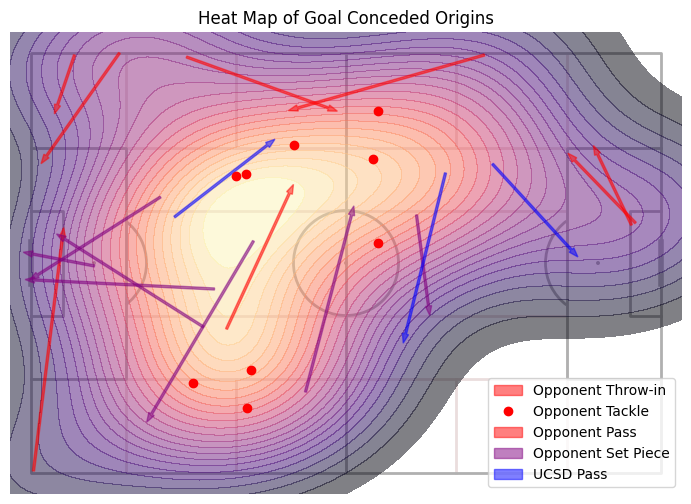

In [13]:
originsGoals = origins[origins.get("resultGoal")]
pitch = Pitch(positional=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=originsGoals.get("startX"),y=originsGoals.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(originsGoals.shape[0]):
    row = originsGoals.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Set Piece":
         color = "purple"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .5,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Goal Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
originsGoals.shape[0]

Text(0.5, 1.0, 'Opponent Goal Origin')

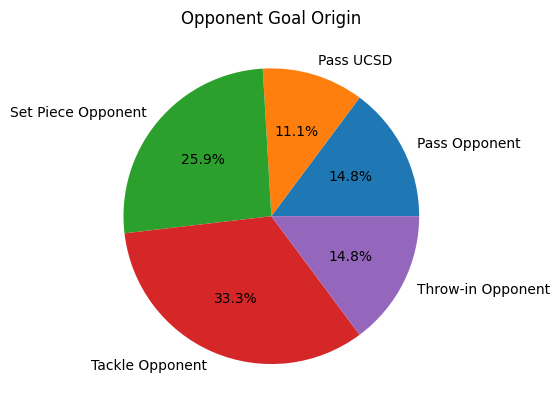

In [14]:
originCounts = originsGoals.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("Game"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Goal Origin")

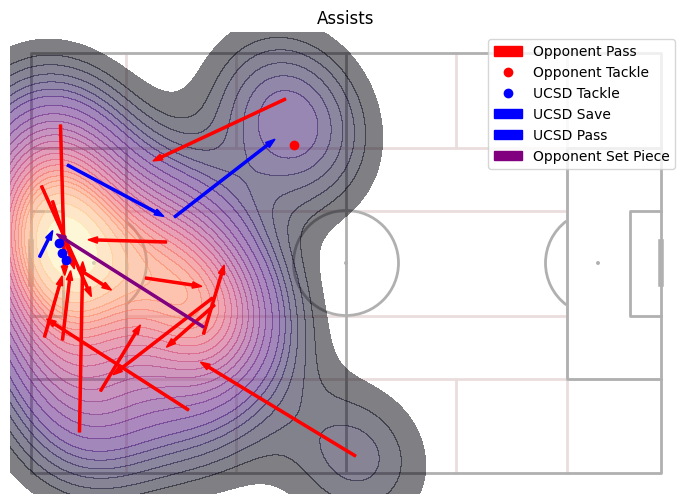

In [15]:
assists = shotAssists[shotAssists.get("Shot result")=="Successful"]
pitch = Pitch(positional=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=assists.get("startX"),y=assists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(assists.shape[0]):
    row = assists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event")=="Set Piece":
         color = "purple"
    else:
         linestyle = ""
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = 1,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Assists")
plt.show()

Text(0.5, 1.0, 'Opponent Assists')

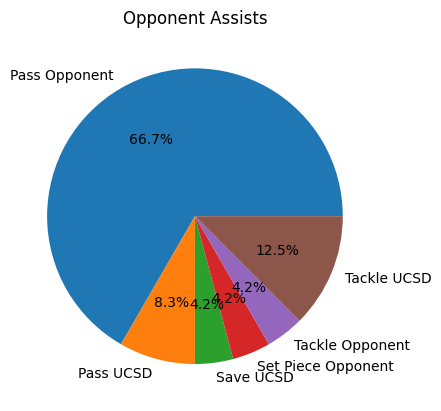

In [16]:
originCounts = assists.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("Game"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Assists")

Text(0.5, 1.0, 'Opponent Shot Assists')

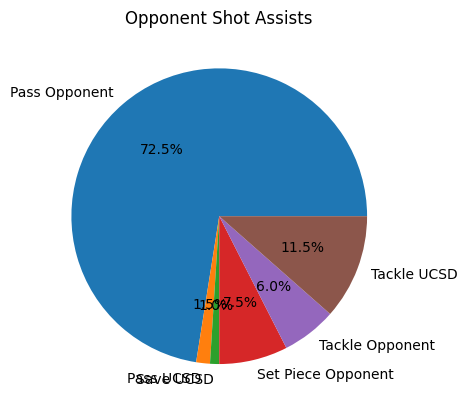

In [17]:
originCounts = shotAssists.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("Game"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shot Assists")

In [18]:
files = ['bakersfieldOrigins.csv',
 'calPolyOrigins.csv',
 'csunOrigins.csv',
 'davisOrigins.csv',
 'fullertonOrigins.csv',
 'irvineOrigins.csv',
 'riversideOrigins.csv',
 'sacStateOrigins.csv',
 'ucsbOrigins.csv',]

merged = pd.read_csv("Shots/"+files[0])
merged = merged.get(["index","Game","numOpportunity","Event","Result","startX","startY","endX","endY","Side","Team","Player"])
numOpp = merged.get("numOpportunity").max()+1
for file in files:
    df = pd.read_csv("Shots/"+file)
    df = df.get(["index","Game","numOpportunity","Event","Result","startX","startY","endX","endY","Side","Team","Player"])
    df["numOpportunity"]+=numOpp
    numOpp = df.get("numOpportunity").max()+1
    merged = pd.merge(merged,df,how="outer")
opportunities = merged.dropna()
opportunities["Team"] = opportunities["Team"].apply(lambda team: "UCSD" if team =="UCSD" else "Opponent")
opportunities = opportunities.sort_values(["numOpportunity","index"])
opportunityGoals = []
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[-1]
    if ("Shot" in limited.get("Event"))and (limited.get("Result") =="Successful"):
        opportunityGoals.append(i)
def addGoal(num):
    if num in opportunityGoals:
        return True
    else:
        return False
opportunities = opportunities.assign(resultGoal = opportunities.get("numOpportunity").apply(addGoal))
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [40]:
playerMap = {8:"Quinn",12:"James",19:"Jonah",10:"Carter",20:"Cole"}

playerTurnovers  = origins.groupby("Player").count().reset_index()
playerTurnovers = playerTurnovers[playerTurnovers.get("Player")!=-1]
playerTurnovers["Turnovers"]=playerTurnovers["Game"]
playerTurnovers = playerTurnovers.get(["Player","Turnovers"]).set_index("Player").sort_values("Turnovers",ascending=False).iloc[:5].reset_index()
playerTurnovers["Player"] = playerTurnovers["Player"].apply(lambda num: playerMap[num])
playerTurnovers.set_index("Player")

,Turnovers
Player,
Quinn,13
James,9
Jonah,7
Carter,5
Cole,5


In [47]:
playerMap = {8:"Quinn",12:"James",19:"Jonah",10:"Carter",20:"Cole",2:"Evan",17:"McGee",23:"Max",29:"Kai"}
originsGoals = origins[origins.get("resultGoal")]

playerTurnovers  = originsGoals.groupby("Player").count().reset_index()
playerTurnovers = playerTurnovers[playerTurnovers.get("Player")!=-1]
playerTurnovers["Mistakes to Goals"]=playerTurnovers["Game"]
playerTurnovers = playerTurnovers.get(["Player","Mistakes to Goals"]).set_index("Player").sort_values("Mistakes to Goals",ascending=False).reset_index()
playerTurnovers["Player"] = playerTurnovers["Player"].apply(lambda num: playerMap[num])
playerTurnovers.set_index("Player")

,Mistakes to Goals
Player,
Quinn,3
Evan,1
McGee,1
Cole,1
Max,1
Kai,1


In [26]:
oringsNoSet[(oringsNoSet.get("startX")>=25) & (oringsNoSet.get("startX")<=50)].shape[0]/oringsNoSet.shape[0]

0.3945578231292517

<Axes: >

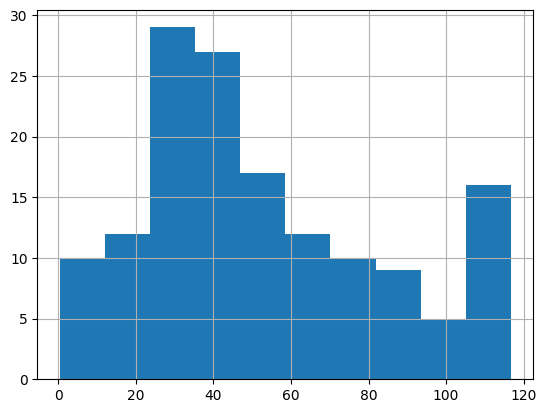

In [25]:
oringsNoSet["startX"].hist()

Text(0.5, 1.0, "40% of opponent's chances come from this area")

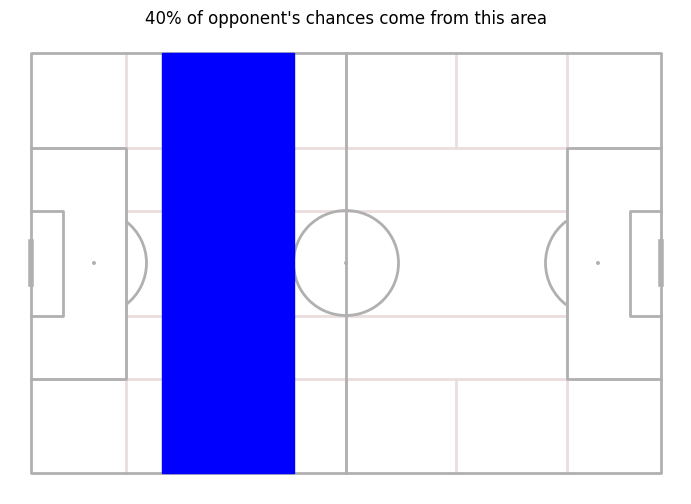

In [34]:
from matplotlib.patches import Rectangle
 

pitch = Pitch(positional=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
ax.add_patch(Rectangle((25, 0), 25, 80,color="blue"))
plt.title("40% of opponent's chances come from this area")